<a href="https://colab.research.google.com/github/deathonote/ML/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files


uploaded = files.upload()

Saving housing.csv to housing.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('housing.csv')
rows=len(df)
#to string here
print("number of rows is",rows)
print(df.head())


number of rows is 20640
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


In [ ]:
print(df.describe().transpose())

                      count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000   

In [8]:
mean=df[['longitude','latitude','housing_median_age','total_rooms','population','households','median_income','total_bedrooms']].mean()
max=df[['longitude','latitude','housing_median_age','total_rooms','population','households','median_income','total_bedrooms']].max()
min=df[['longitude','latitude','housing_median_age','total_rooms','population','households','median_income','total_bedrooms']].min()
median=df[['longitude','latitude','housing_median_age','total_rooms','population','households','median_income','total_bedrooms']].median()
sd=df[['longitude','latitude','housing_median_age','total_rooms','population','households','median_income','total_bedrooms']].std()


In [74]:
#draw different graphs for different columns?
descriptive_stats = pd.DataFrame({
    'min': min,
    'max': max,
    'mean': mean,
    'median': median,
    'std':sd
})

<Axes: >

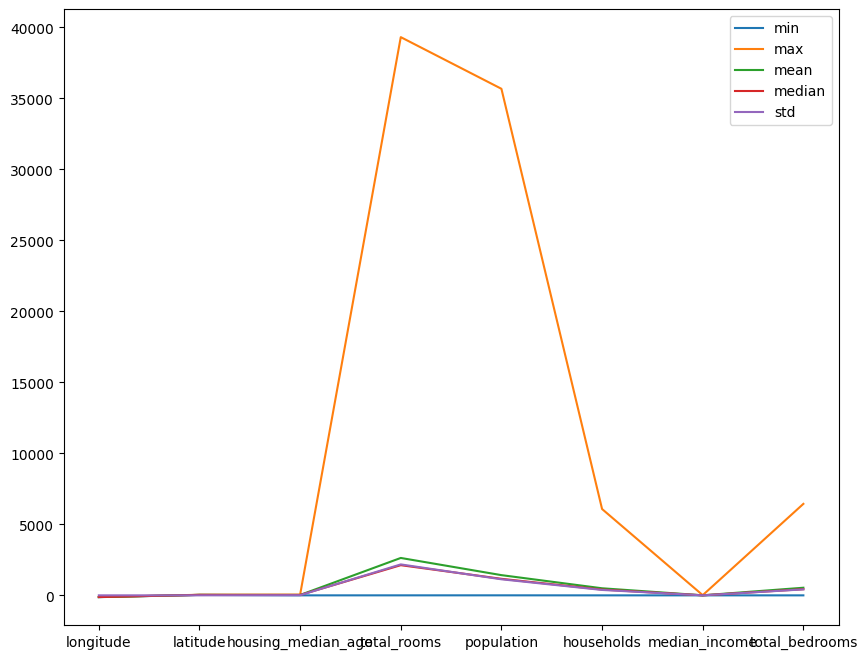

In [79]:
descriptive_stats.plot(kind='line',figsize=(10,8))

Text(0.5, 1.0, 'Scatter Plot of Long vs Lat')

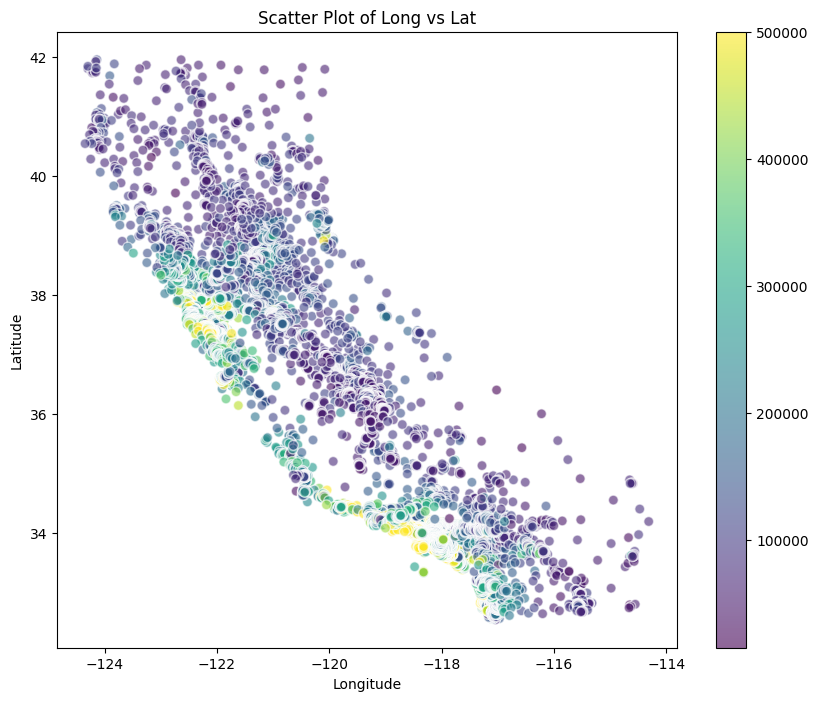

In [25]:
plt.figure(figsize=(10, 8))  # Set the figure size
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'],
                      cmap='viridis', s=50, alpha=0.6, edgecolor='w')
plt.colorbar(scatter)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Long vs Lat')


In [70]:
missing_col=df.columns[df.isnull().any()]
missing_row=df.isnull().sum(axis=1)
missing_counts = df[missing_col].isnull().sum()
rows_count = missing_row[missing_row > 0].count()
print(missing_col)
print(rows_count)
#filling with median and creating new data frame
df_filled=df.fillna(median)

Index(['total_bedrooms'], dtype='object')
207


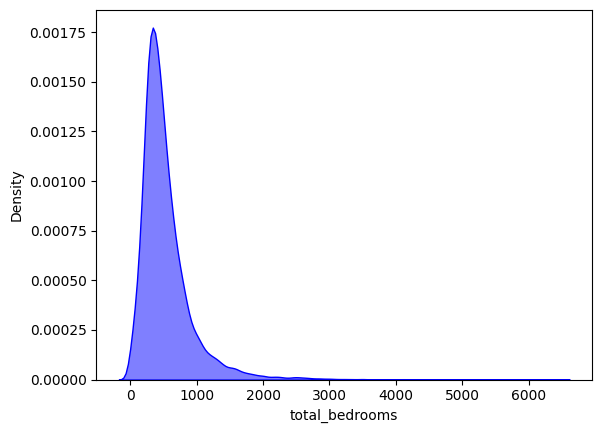

In [81]:
for col in missing_col:
        plt.figure(figsize=(12, 6))
        sns.kdeplot(df[col], label=f'{col} (Before Imputation)', color='blue', fill=True, alpha=0.5)
        plt.legend()
        plt.show()

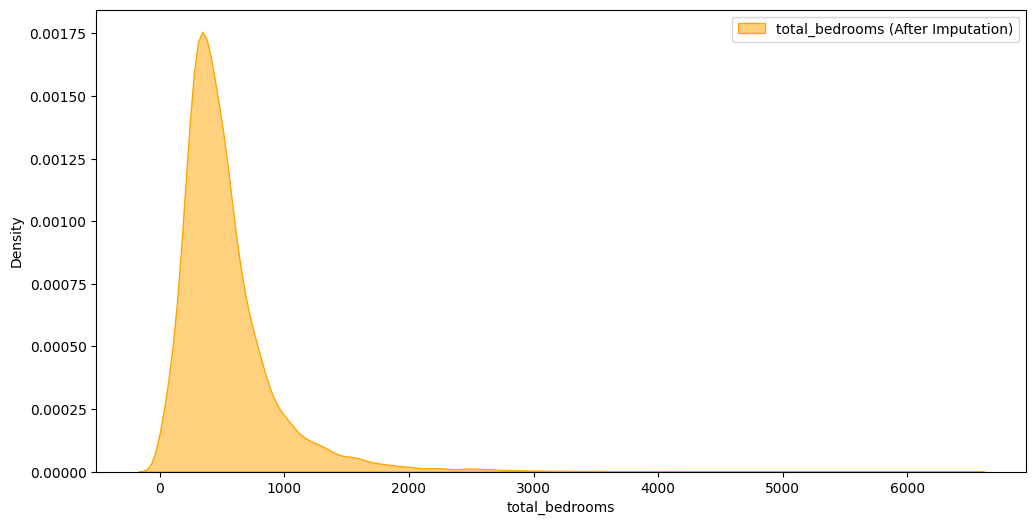

In [72]:
for col in missing_col:
        plt.figure(figsize=(12, 6))
        sns.kdeplot(df_filled[col], label=f'{col} (After Imputation)', color='orange', fill=True, alpha=0.5)
        plt.legend()
        plt.show()

In [50]:
df_filled.drop_duplicates(inplace=True)

In [51]:
df_filled[df_filled['housing_median_age']>25].shape

(12010, 10)

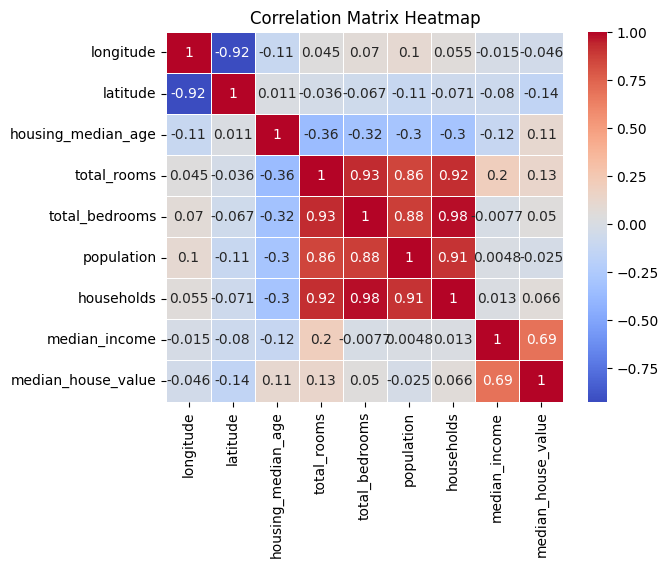

                  longitude            latitude        housing_median_age  \
                       mean   median       mean median               mean   
ocean_proximity                                                             
0               -118.847766 -118.275  34.560577  34.03          29.279225   
1               -119.732990 -120.000  36.731829  36.97          24.271867   
2               -118.354000 -118.320  33.358000  33.34          42.400000   
3               -122.260694 -122.250  37.801057  37.79          37.730131   
4               -119.332555 -118.260  34.738439  33.79          29.347254   

                        total_rooms         total_bedrooms         \
                median         mean  median           mean median   
ocean_proximity                                                     
0                 30.0  2628.343586  2108.0     546.539185  438.0   
1                 23.0  2717.742787  2131.0     533.881619  423.0   
2                 52.0  1574.600000  1

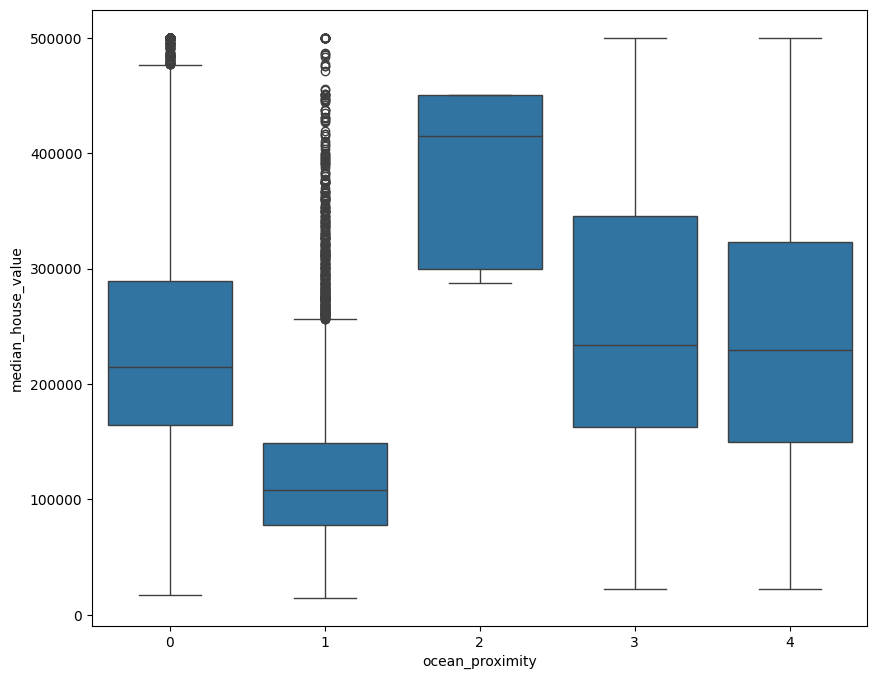

<Figure size 1000x800 with 0 Axes>

In [18]:
#a heat map
df_num=df.drop(columns=['ocean_proximity'])
corr_mat=df_num.corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',linewidth=0.4)
plt.title('Correlation Matrix Heatmap')
plt.show()

#d part cost_sqft missing

grouped = df.groupby('ocean_proximity').agg(['mean','median'])
ocean_prox_le=LabelEncoder()
df['ocean_proximity']=ocean_prox_le.fit_transform(df['ocean_proximity'])
print(grouped)
plt.figure(figsize=(10,8))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df)
plt.show()
plt.figure(figsize=(10,8))
#sns.boxplot(x='median_house_value',y='median_income',data=df)
plt.show()






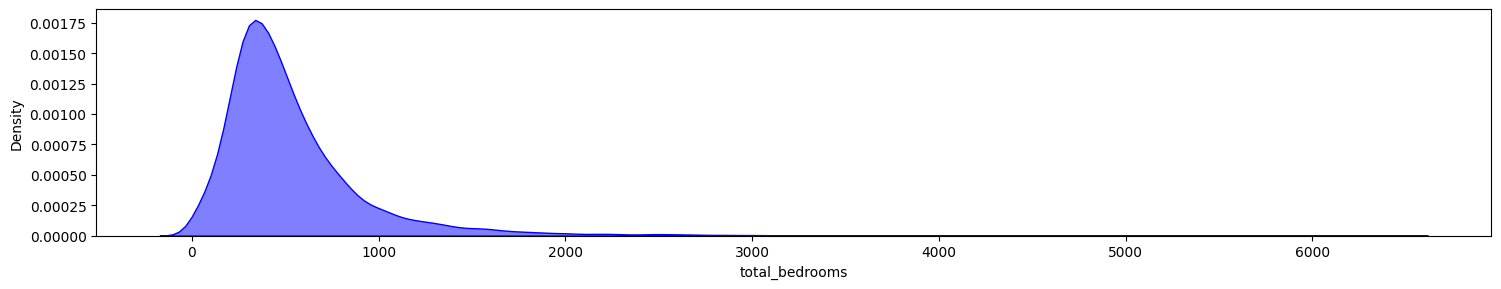

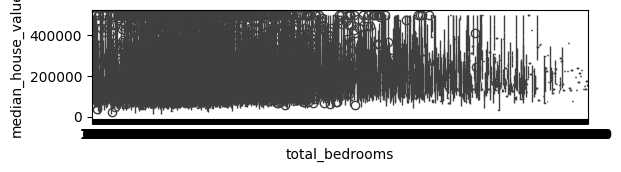

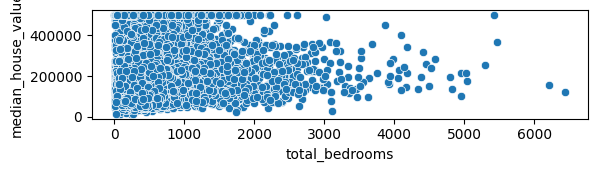

In [48]:
def Plot(df,column_name):
  plt.figure(figsize=(18,10))
  plt.subplot(3,1,1)
  sns.kdeplot(df[column_name],label=f'{column_name}',color='blue',fill=True,alpha=0.5)
  plt.show()
  plt.subplot(3,1,2)
  sns.boxplot(x=column_name,y='median_house_value',data=df)
  plt.show()
  plt.subplot(3,1,3)
  sns.scatterplot(x=column_name,y='median_house_value',data=df)
  plt.show()
Plot(df,'total_bedrooms')

